# Solution Graded Exercise 12: Spatial Working Memory (Compte et. al.)

first name: Olesia

last name: Altunina

sciper: 285467

date: May 28, 2018

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex12_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html

## \* \* \* \* IMPORTANT: neurodynex update  \* \* \* \*

This exercise requires an update of the neurodynex package. For the update, please run the following lines in your terminal:

> source activate bmnn
>
> conda update -c brian-team -c epfl-lcn neurodynex

In [158]:
# All imports here.
%matplotlib inline
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
from matplotlib import pyplot as plt
import numpy as np
import math
import pickle

# Exercise 12.1. Spontaneous bump formation

### Exercise 12.1.1. Question: External poisson population
1) By default, how many neurons are in the external poisson population?

2) Using the default parameters, what is the average number of spikes/second an excitatory neuron receives from the external population? 
#### [1 + 1  points]

1) From [`working_memory_network.wm_model.simulate_wm()`](https://www.google.com): `N_extern_poisson=1000`;

2) `N_extern_poisson * poisson_firing_rate = 1000 * 1.4*hertz` $= 1.4 \, kHz$.

3) We use the Brian2 PoissonInput to implement the external population. Which post-synaptic variable is targeted by a presynaptic (poisson) spike?

#### [1  points]

In [ ]:
input_ext2excit = PoissonInput(target=excit_pop, target_var="s_AMPA",
                                N=N_extern_poisson, rate=poisson_firing_rate, weight=1.0)
input_ext2inhib = PoissonInput(target=inhib_pop, target_var="s_AMPA",
                                N=N_extern_poisson, rate=poisson_firing_rate, weight=1.0)

↑ `s_AMPA` of both excitatory (`excit_pop`) and inhibitory (`inhib_pop`) populations are targeted by the presynaptic Poisson spikes.

4) The dynamics of that variable are defined in the equations excit_lif_dynamics (still in the source code of simulate_wm). What is the time-scale of that variable (in milliseconds)?

#### [1  points]

`tau_AMPA = .9 * 2.0 * b2.ms`

### Exercise 12.1.2. Question: Unstructured input

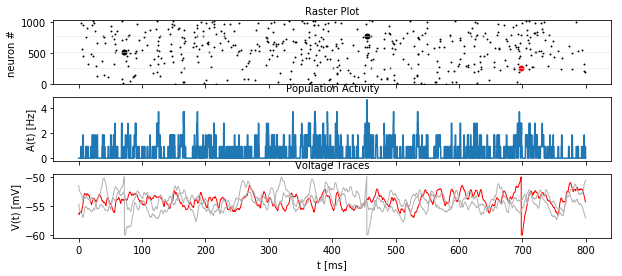

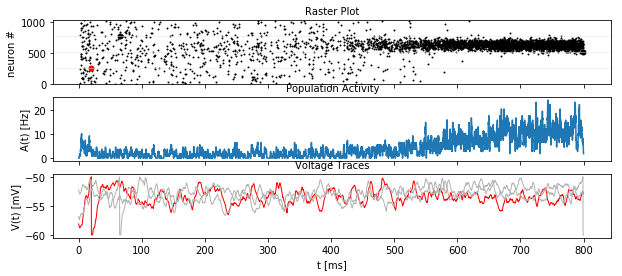

In [108]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, \
rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, \
w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, \
                                 sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, \
rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, \
w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=2.2 * b2.Hz, \
                                 sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

1) Without coding, from the plot: What is the population activity (mean firing rate) of the excitatory population at different points in time?
2) Change the firing rate of the external population to 2.2Hz. What do you observe?

#### [2  + 2  points]

1) The activity is proportional to ~$1 \, Hz$ (because $A(t)$ is additive) and, on average, stays below ~$3 \, Hz$. It has, however, spontanuous bursts up to ~$6 \, Hz$. No bumps are formed at this external firing frequency. Neurons fire very seldom (1-2 times during the modelling period). Given that modelling period is 800 steps, and neuron population is of size 1000, it's plausible that the average population activity roughly equals the quantity of spikes of a single neuron.

2) In the first 10 seconds there is a burst in activity up to $10$-$20 \, Hz$, and after that it drops to twice as much (with a few spontaneous bursts). At this external firing frequency, the bumps are formed.

3) Run the simulation a few times with r_ext = 2.2 Hz. Describe your observations.

#### [2   points]

- There is always a burst in activity in the beginning of the simulation.
- Concerning the bump formation, there are 2 main outcomes:
    1. The bump doesn't form, the activity stays the same.
    2. The bump forms, the activity increases twice.
- If bumps are formed, they form in during the third part of the simulation. Some earlier, some later.

### Exercise 12.1.3. Question: Weight profile

Jpos_excit2excit=1.6


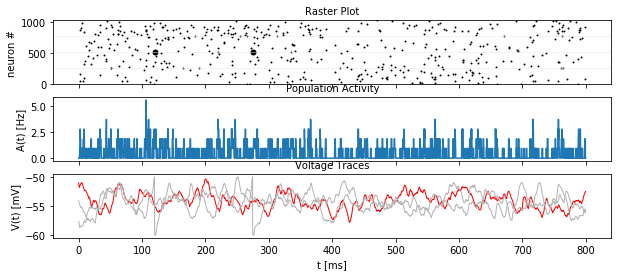

Jpos_excit2excit=1.775


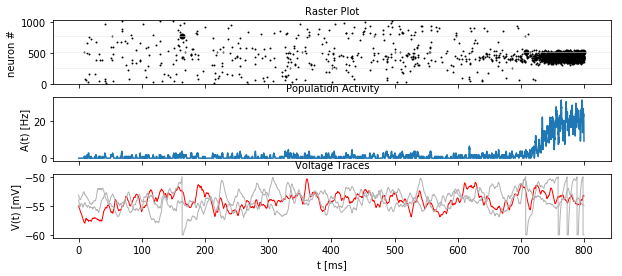

Jpos_excit2excit=1.95


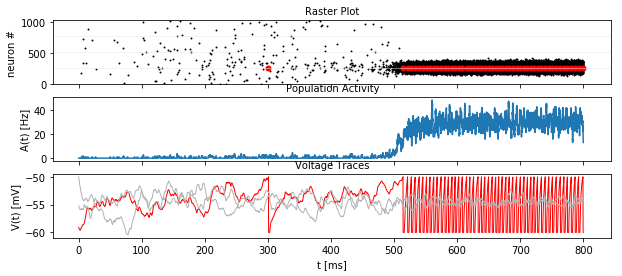

Jpos_excit2excit=2.125


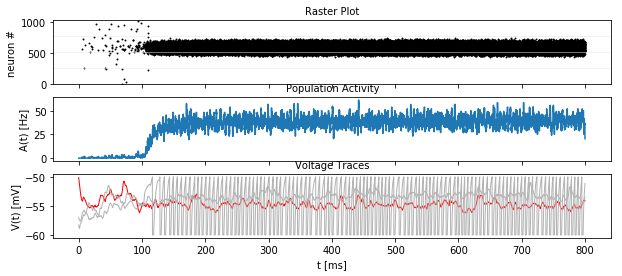

Jpos_excit2excit=2.3


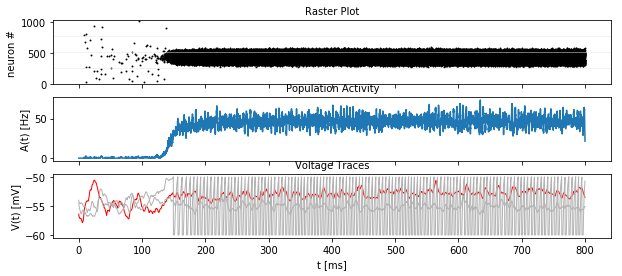

In [115]:
sigma_weight_profile = 20.
weight_profiles = []

for i, Jpos_excit2excit in enumerate(np.linspace(1.6, 2.3, 5)):
    print('Jpos_excit2excit={}'.format(Jpos_excit2excit))
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, \
    rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, \
    weight_profile_45 = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, \
                                             sigma_weight_profile=sigma_weight_profile, Jpos_excit2excit=Jpos_excit2excit)
    plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
                                           t_min=0. * b2.ms)
    plt.savefig('pics/ex1.3/plot_activity_Jpos_excit2excit_{}.png'.format(Jpos_excit2excit), dpi=300)
    plt.show()

    weight_profiles.append(weight_profile_45)

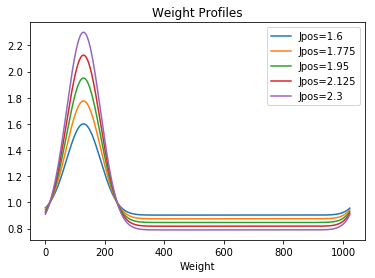

In [116]:
for i, Jpos in enumerate(np.linspace(1.6, 2.3, 5)):
    plt.plot(weight_profiles[i], label='Jpos={}'.format(Jpos))
plt.xlabel('Neurons')
plt.xlabel('Weight')
plt.title('Weight Profiles')
plt.legend()
plt.savefig('pics/ex1.3/weights_profile_{}_Js.png'.format(sigma_weight_profile), dpi=300)

sigma_weight_profile=10.0


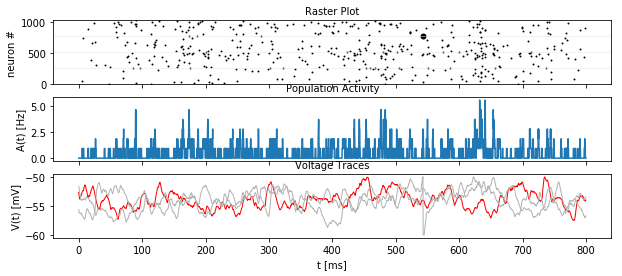

sigma_weight_profile=20.0


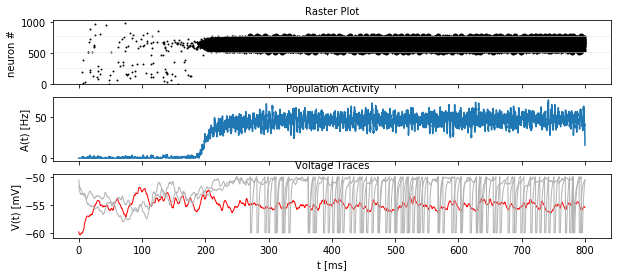

sigma_weight_profile=30.0


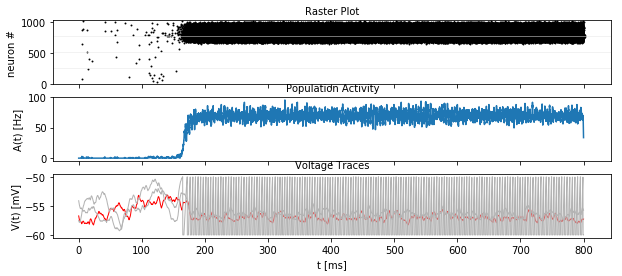

sigma_weight_profile=40.0


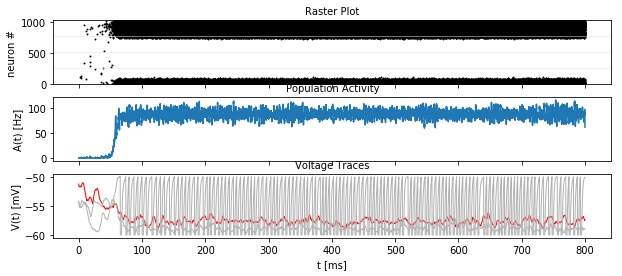

sigma_weight_profile=50.0


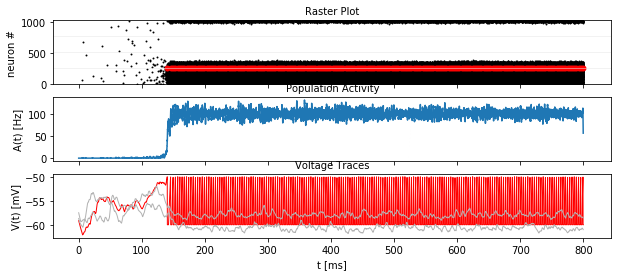

In [119]:
Jpos_excit2excit = 2.3
weight_profiles_sigma = []

for i, sigma_weight_profile in enumerate(np.linspace(10, 50, 5)):
    print('sigma_weight_profile={}'.format(sigma_weight_profile))
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, \
    rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, \
    weight_profile_45 = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, \
                                             sigma_weight_profile=sigma_weight_profile, Jpos_excit2excit=Jpos_excit2excit)
    plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
                                           t_min=0. * b2.ms)
    plt.savefig('pics/ex1.3/plot_activity_sigma_weight_profile_{}.png'.format(sigma_weight_profile), dpi=300)
    plt.show()

    weight_profiles_sigma.append(weight_profile_45)

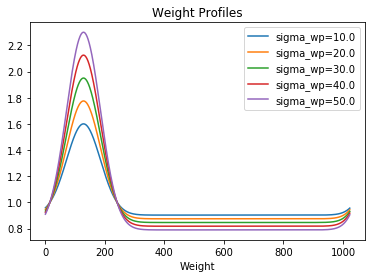

In [121]:
for i, sigma_weight_profile in enumerate(np.linspace(10, 50, 5)):
    plt.plot(weight_profiles[i], label='sigma_wp={}'.format(sigma_weight_profile))
plt.xlabel('Neurons')
plt.xlabel('Weight')
plt.title('Weight Profiles')
plt.legend()
plt.savefig('pics/ex1.3/weights_profile_{}_sigmas.png'.format(Jpos_excit2excit), dpi=300)

Answer here to the comment questions (max 6 lines overall).

#### [ 5  points]

- The more the excitatory coupling rate `Jpos_excit2excit`, the sooner the bumps are formed (after $500 \, ms$ for $J = 1.95$, after ~$150 \, ms$ for $J = 2.3$), the wider the bump is (for the same `sigma_weight_profile`), the more the average activity when bumps stabilise (~$30 \, Hz$ for $J = 1.95$, ~$50 \, Hz$ for $J = 2.3$), the more the amplitude of the peak of the weights profile.
- The more the noise std of the excitatory population `sigma_weight_profile`, the wider the weights profile (by definition), the steeper the slope during the activity transition, the more the average activity when bumps stabilise (~$65 \, Hz$ for $\sigma = 30$, ~$80 \, Hz$ for $\sigma = 40$).
- `Jpos_excit2excit in np.linspace(1.6, 2.3, 5)` changes the weights profile in the same way as `sigma_weight_profile in np.linspace(1.6, 2.3, 5)`.
    

# Exercise 12.2. Network response to a structured input stimulus

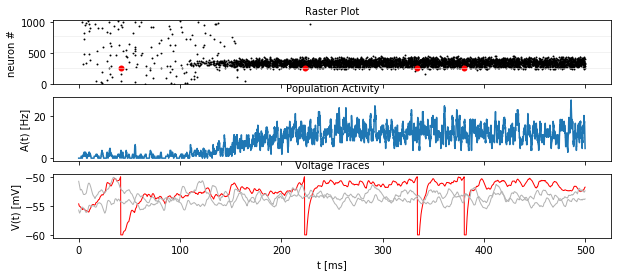

In [64]:
N_inhibitory = 1
stimulus_strength=0.65 * b2.namp
t_stimulus_start=5 * b2.ms
t_stimulus_duration=25 * b2.ms
sim_time=80. * b2.ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, \
rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, \
w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=stimulus_width_deg, \
                                 stimulus_strength=stimulus_strength*b2.namp, t_stimulus_start=100 * b2.ms, \
                                 t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, \
ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, \
                                                       voltage_monitor_excit, t_min=0. * b2.ms)

plt.savefig('pics/ex2.1/stimulus_width_deg_{}.png'.format(stimulus_width_deg), dpi=300)
plt.show()

### Exercise 12.2.1. Question: Integration of input

#### [5  points]

Answer here to the comment questions (max 6 lines overall).

- At which time can you identify a change in the population activity? How does that compare to the time when the stimulus is applied?
    - I start noticing the change in activity $40$-$50 \, ms$ after the stimulus.
- What is the population activity at the end of the simulation?
    - $\langle A(t)_{stable}\rangle \simeq 400 \, Hz$
- For the time point t=400ms, sketch the firing rate across the population (neuron index on the x-axis, per-neuron firing rate on the y-axis).

In [122]:
from scipy.stats import norm

Text(0.5,1,'Rough Firing Freq Distribution')

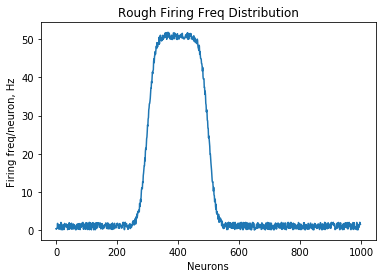

In [140]:
x = np.linspace(0, 1000, 500)
step = [1 if 200 < iks < 600 else 0 for iks in x]
gaussian = norm.pdf(x, loc=400, scale=40)
y = np.convolve(step, gaussian)
plt.plot(y*100+np.random.rand(y.shape[0])*2)
plt.xlabel('Neurons')
plt.ylabel('Firing freq/neuron, Hz')
plt.title('Rough Firing Freq Distribution')

- Increase the stimulus strength to 0.5namp. What happens when the stimulus stops?
    - When the stimulus stops, the average activity abruptly drops to roughly its level during the $0.06 \, nA$ stimulation.

|**`stimulus_strength` = 0.06** | **`stimulus_strength` = 0.5**|
|-------------------------------|------------------------------|
|![0.06 nA](pics/ex2.1/stimulus_strength_0.06.png)|![0.5 nA](pics/ex2.1/stimulus_strength_0.5.png)|

- Increase the stimulus width to 60deg (stimulus_strength=0.1 * b2.namp, stimulus center = 120deg). How does the bump shape change?
    - The bump becomes wider and the cone in the beginning (formation stage) flattens significantly.

|**`stimulus_width_deg` = 30** | **`stimulus_width_deg` = 60**|
|-------------------------------|------------------------------|
|![30](pics/ex2.1/stimulus_width_deg_30.png)|![60](pics/ex2.1/stimulus_width_deg_60.png)|

### Exercise 12.2.2. Question: Role of the inhibitory population

#### [2+1+1+2  points]

Before running the simulation: What do you expect to see? (max 2 lines)

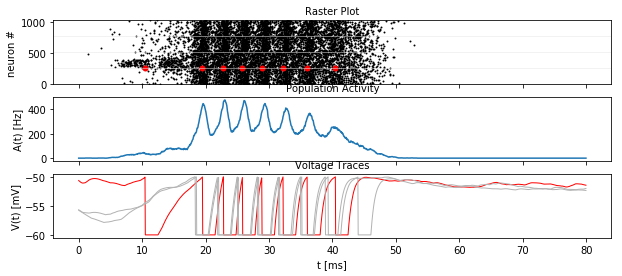

In [142]:
N_inhibitory = 81
stimulus_strength=0.65
t_stimulus_start=5
t_stimulus_duration=25
sim_time=80.

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, \
rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, \
w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=stimulus_width_deg, \
                                 stimulus_strength=stimulus_strength*b2.namp, \
                                 t_stimulus_start=t_stimulus_start*b2.ms, \
                                 t_stimulus_duration=t_stimulus_duration*b2.ms, sim_time=sim_time*b2.ms, \
                                 N_inhibitory=N_inhibitory)
fig, ax_raster, \
ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, \
                                                       voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

Now run again a “normal” simulation:

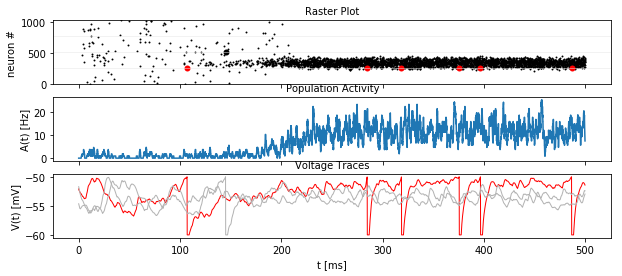

In [145]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, \
rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, \
w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, \
                                 t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)

fig, ax_raster, \
ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, \
                                                       voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

What is the role of the inhibitory population? (max 2 lines)

The role of the inhibitory population is to introduce stochasticity (noise) into the voltage traces thus regulating the population activity: making it smaller and preventing from high activity oscillations, which yield no functional plausibility, and eventually leading to bump formation.

# Exercise 12.3: Decoding the population activity into a population vector

### Exercise 12.3.1. Mapping the neuron index onto its preferred direction

#### [3 points]

In [146]:
orientations = []
get_orientation = lambda idx_list, N: [round((idx+0.5)*360/float(N), 2) for idx in idx_list]
print('[16.36, 49.09, 180.0, 343.64]')
get_orientation([0, 1, 5, 10], 11)

[16.36, 49.09, 180.0, 343.64]


[16.36, 49.09, 180.0, 343.64]

### Exercise 12.3.2. Extracting spikes from the spike monitor


#### [ 4  points]

In [147]:
# modify the following code
def get_spike_count(spike_monitor, spike_index_list, t_min, t_max, trains=False):
    nr_neurons = len(spike_index_list)
    spike_count_list = np.zeros(nr_neurons)
    if trains:
        spike_trains = spike_monitor
    else:
        spike_trains = spike_monitor.spike_trains()
    for i in range(len(spike_index_list)):
    # loop over the list of neurons and get the spikes within the time window:
        spike_count_list[i] = sum([(spike_trains[i][j] >= t_min) and (spike_trains[i][j] < t_max) \
                                   for j in range(len(spike_trains[i]))])  # try sum(list of booleans)
    return spike_count_list

Text(0,0.5,'Spike rate [Hz]')

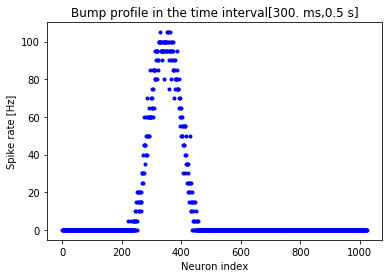

In [149]:
import matplotlib.pyplot as plt

t = 400*b2.ms  # time point of interest
t_window = 200*b2.ms # width of the window over which the average is taken

t_min = t-t_window/2
t_max = t+t_window/2
spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
spike_rates = spike_counts/(t_max-t_min)/b2.second
plt.plot(spike_rates, ".b")
plt.title("Bump profile in the time interval[{},{}]".format(t_min, t_max))
plt.xlabel("Neuron index")
plt.ylabel("Spike rate [Hz]")

### Exercise 12.3.3. Computing the population vector

#### [3  points]

In [176]:
def get_theta_time_series(spike_monitor, idx_monitored_neurons, t_snapshots, t_window_width, trains=False):
    N_neurons = len(idx_monitored_neurons)
    if trains:
        spike_trains = spike_monitor
        trains = True
    else:
        spike_trains = spike_monitor.spike_trains()
        trains = False
    normalised_count = lambda t: get_spike_count(spike_monitor, idx_monitored_neurons, \
                                                 t-t_window_width/2, t+t_window_width/2, trains=trains)/ \
                                 sum(get_spike_count(spike_monitor, idx_monitored_neurons, \
                                                 t-t_window_width/2, t+t_window_width/2, trains=trains))
    orientation = get_orientation(idx_monitored_neurons, len(spike_trains))
    return [sum(normalised_count(t) * orientation) \
            for t in t_snapshots]

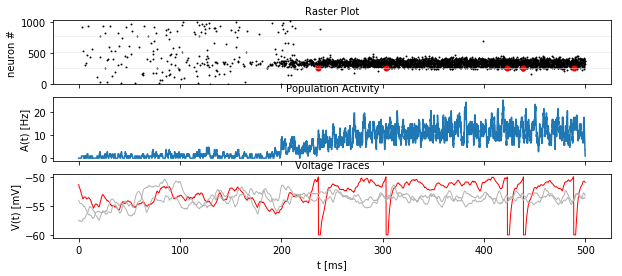

In [151]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, \
rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, \
w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, \
                                 t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)

fig, ax_raster, \
ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, \
                                                       voltage_monitor_excit, t_min=0. * b2.ms)

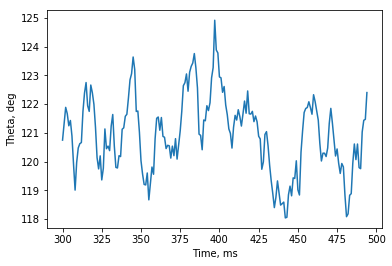

In [159]:
t_window_width = 10.*b2.ms
sim_time = 500.*b2.ms
snapshot_interval = 1.*b2.ms
t_stimulus_start = 100 * b2.ms
t_stimulus_duration = 200 * b2.ms

# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(math.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
    int(math.floor((sim_time-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

# how your function get_theta_time_series could be called:
theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_width)

# plot theta vs time using pyplot
plt.plot(t_snapshots/b2.ms, theta_ts)
plt.xlabel('Time, ms')
plt.ylabel('Theta, deg')
plt.show()

### Exercise 12.3.4. Exercise: Visualize the diffusion of the population vector

#### [3 (coding) + 2 (discussion) points]

In [256]:
rate_monitor_excit_dict = {}
spike_monitor_excit_dict = {}
voltage_monitor_excit_dict = {}
idx_monitored_neurons_excit_dict = {}
rate_monitor_inhib_dict = {}
spike_monitor_inhib_dict = {}
voltage_monitor_inhib_dict = {}
idx_monitored_neurons_inhib_dict = {}
w_profile_dict = {}

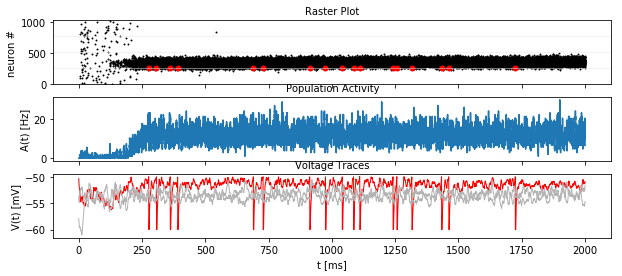

In [331]:
# I ran the same cell multiple times, and added return values to the dictionary defined just above.
rate_monitor_excit_dict[10], spike_monitor_excit_dict[10], voltage_monitor_excit_dict[10], idx_monitored_neurons_excit_dict[10], \
rate_monitor_inhib_dict[10], spike_monitor_inhib_dict[10], voltage_monitor_inhib_dict[10], idx_monitored_neurons_inhib_dict[10], \
w_profile_dict[10] = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, \
                                 t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=2000. * b2.ms,
                                 N_excitatory=1024, N_inhibitory=256, weight_scaling_factor=2.0)

fig, ax_raster, \
ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit_dict[10], spike_monitor_excit_dict[10], \
                                                       voltage_monitor_excit_dict[10], t_min=0. * b2.ms)

In [ ]:
# Retrieve some picklable information.
dicts = { 
    'spike_monitor_excit_dict': {i: spike_monitor_excit_dict[i].spike_trains() for i in spike_monitor_excit_dict.keys()}, 
    'idx_monitored_neurons_excit_dict': idx_monitored_neurons_excit_dict,
    'spike_monitor_inhib_dict': {i: spike_monitor_inhib_dict[i].spike_trains() for i in spike_monitor_inhib_dict.keys()},
    'idx_monitored_neurons_inhib_dict': idx_monitored_neurons_inhib_dict,
    'w_profile_dict': w_profile_dict
}

In [170]:
dicts = {
    'spike_monitor_excit_dict': {},
    'idx_monitored_neurons_excit_dict': {},
    'spike_monitor_inhib_dict': {},
    'idx_monitored_neurons_inhib_dict': {},
    'w_profile_dict': {}
}

In [171]:
#for name, dict_ in zip(dicts.keys(), dicts.values()):
#    print(name)
#    with open('ex3_{}.pkl'.format(name), 'wb') as f:
#        pickle.dump(dict_, f)
        
# Uncomment to load.
for name, dict_ in zip(dicts.keys(), dicts.values()):
    with open('ex3_{}.pkl'.format(name), 'rb') as f:
        dicts[name] = pickle.load(f)

Text(0.5,1,'Population activity at N_excitatory=1024')

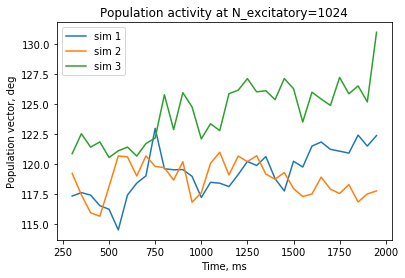

In [178]:
t_window_width = 10.*b2.ms
sim_time = 2000.*b2.ms
snapshot_interval = 50.*b2.ms
t_stimulus_start = 100 * b2.ms
t_stimulus_duration = 200 * b2.ms

# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(math.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
    int(math.floor((sim_time-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

# Ranges for i:
# 1-3 -- N_excitatory=2048
# 4 -- different weights scaling (checked just in case, not neede for plotting)
# 5-7 -- N_excitatory=512
# 8-10 -- N_excitatory=1024
for i in range(8, 11):
    # how your function get_theta_time_series could be called:
    theta_ts = get_theta_time_series(dicts['spike_monitor_excit_dict'][i], dicts['idx_monitored_neurons_excit_dict'][i], \
                                     t_snapshots, t_window_width, trains=True)

    # plot theta vs time using pyplot
    plt.plot(t_snapshots/b2.ms, theta_ts, label="sim {}".format(i-7))
    
plt.legend()
plt.xlabel('Time, ms')
plt.ylabel('Population vector, deg')
plt.title('Population activity at N_excitatory=1024')

plt.savefig('pics/ex3/N_excitatory_1024.png')

In [342]:
theta_ts_all = {}
for i in range(1, 11):
    # how your function get_theta_time_series could be called:
    theta_ts_all[i] = get_theta_time_series(spike_monitor_excit_dict[i], idx_monitored_neurons_excit_dict[i], \
                                            t_snapshots, t_window_width)

In [343]:
#with open('ex3_theta_ts_all.pkl', 'wb') as f:
#    pickle.dump(theta_ts_all, f)

# Uncomment to load.
#    with open('ex3_theta_ts_all.pkl', 'rb') as f:
#        theta_ts_all = pickle.load(f)

Stds
N_excitatory=2048
3.36965995068
N_excitatory=1024
3.18936384585
N_excitatory=512
4.80342058187


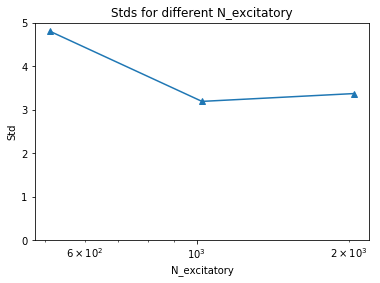

In [407]:
std_2048 = np.std(np.concatenate((theta_ts_all[1], theta_ts_all[2], theta_ts_all[3])))
std_1024 = np.std(np.concatenate((theta_ts_all[8], theta_ts_all[9], theta_ts_all[10])))
std_512 = np.std(np.concatenate((theta_ts_all[5], theta_ts_all[6], theta_ts_all[7])))

print('Stds')
print('N_excitatory=2048')
print(std_2048)
print('N_excitatory=1024')
print(std_1024)
print('N_excitatory=512')
print(std_512)
plt.plot([2048, 1024, 512], [std_2048, std_1024, std_512], marker='^')
plt.xlabel('N_excitatory')
plt.ylabel('Std')
plt.xscale('log')
plt.ylim(0, 5)
plt.title('Stds for different N_excitatory')
plt.show()

*Write your obeservation here (max 4 lines)* 

|**`N_excitatory` = 2048** | **`N_excitatory` = 1024** | **`N_excitatory` = 512** |
|-------------------------------|------------------------------|
|![2048](pics/ex3/N_excitatory_2048.png)|![1024](pics/ex3/N_excitatory_1024.png)|![512](pics/ex3/N_excitatory_512.png)|

- For `N_excitatory` = 2048, population activity after stimulation averages around ~236 degrees, which is almost twice as much as the stumulus center.
- For `N_excitatory` = 1024, population activity is centred around 120, as applied.
- For `N_excitatory` = 512, population activity is also centred around 120, but standart deviation is significantly more than for both 1024 and 2048 excitatory neurons populations.

# Exercise 12.4. Reading exercise: slow and fast channels

### Exercise 12.4.1.

#### [2 points]
Write your answer here (max 2 lines).

1. Fast rise: `tau_NMDA_s = .65 * 100.0 * b2.ms  # orig: 100`
2. Slow decay: `tau_NMDA_x = .94 * 2.0 * b2.ms`

# Exercise 12.5: Effect of disinhibition on the bump shape
### *** Note:*** this exercise is not available online, all necessary information is given here.

In this exercise we will try to reproduce the results of the paper "*Linking Microcircuit Dysfunction to Cognitive Impairment: Effects of Disinhibition Associated with Schizophrenia in a Cortical Working Memory Model*" (https://academic.oup.com/cercor/article/24/4/859/321897). 
As you can read in the abstract, "Excitation–Inhibition balance (E/I balance) is a fundamental property of cortical microcircuitry. Disruption of E/I balance in prefrontal cortex is hypothesized to underlie cognitive deficits observed in neuropsychiatric illnesses such as schizophrenia". 
In order to understand this exerise, you do not need to read the full paper, but you will need to get a general understanding of the research topic (we recommend to read the abstract) and a detailed understanding of figures  1, 2 and 5 (make sure you understand the meaning of the quantities involved in those plots).

In this paper, the authors pharmacologically alter the E/I balance in the prefrontal cortex through the use of a drug which reduces the conductance of the excitatory-to-inhibitory  synapses, $G_{EI}$. 
In this way, the inhibitory neurons are less activated and therefore the excitatory neurons are disinhibited. 
In other words, they pharmacologically induce the specific symptoms they what to understand.

More interestingly, from our perspective, they use an analogous model that you have been using so far in order to understand **why** disinhibition is associated with some of the symptons of schizophrenia, such as a reduced ability of keeping the focus on a fixation point. 

**Note:**  In what follows we will reproduce qualitatively some of the results shown in the paper's figures. However a perfect match between numerical values cannot be achieved as our neural network slightly differs from that of the paper.

### Exercise 12.5.1
#### [4 points]
As a starting point, we can see qualitatively the effect of disinhibition on the bump width by running the simulation with two different values of $G_{EI}$ (in the code, $G_{EI}$ is "G_excit2inhib"). The plot should be qualitatively similar to Fig. 2.A of the paper.

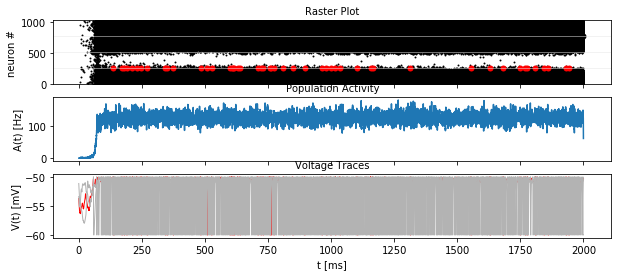

In [432]:
%matplotlib inline
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import ceil, floor

# repeat the following passeages for the desired values of G_EI

G_coef = .29

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, \
rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, \
w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, \
                                 t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=2000. * b2.ms, \
                                 G_excit2inhib=G_coef * 1.2 * 0.292 * b2.nS)

fig, ax_raster, \
ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, \
                                                       voltage_monitor_excit, t_min=0. * b2.ms)

plt.savefig('pics/ex5/G_excit2inhib_{}.png'.format(G_coef * 100), dpi=300)


### Exercise 12.5.2
#### [5 points]

In exercise 12.3.2 you plotted the profile of the bump. Starting from the the bump profile, write the function bump_width() that measures the bump's width. In order to measure the width of the bump, we take the full width at half maximum.  

In [6]:
# this function is useful to compute the bump width
def find_nearest_argmin(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx 

def bump_width(spike_monitor, spike_index_list, t_max, t_min):  
    spike_counts = get_spike_count(spike_monitor, spike_index_list, t_min, t_max)   # use the function get_spike_count
    spike_rates = spike_counts/(t_max-t_min)*b2.second
#    print(spike_counts, spike_rates)
    unique_spike_rates = np.unique(spike_rates)
    if len(unique_spike_rates) < 3:
        bump_size = 0
    else:
        half_max_rate = int(len(unique_spike_rates)/2)
#        print(half_max_rate)
#        peak_position = np.mean(np.argwhere(spike_rates == np.max(spike_rates)))
#        left_bump_boundary = ... # use the find_nearest_argmin to determine the left bump boundary
#        right_bump_boundary = ... # use the find_nearest_argmin to determine the right bump boundary
#        bump_size = right_bump_boundary - left_bump_boundary
        where = np.argwhere(spike_rates > half_max_rate)
#        print(where)
        bump_size = (np.max(where) - np.min(where))/2
    return bump_size

### Exercise 12.5.3
#### [ 6 (for the simulation) + 6 (for the plots) points]
In this exercise we reproduce figures 2.C and 2.D of the paper. 

You will need to use the fucntion bump_width() to plot the bump's width vs the decrease of $G_{EI}$ in percentage, in order to reproduce Fig. 2.B of the paper.

On the other hand you will need to use the function get_theta_time_series, in order to extract the poplation vector (which in the paper is called $\theta_{report}$ or just "report"). 
It is important to chose a proper time bin (such that you filter out the oscillations, but you can still capture the drift of the population vector).

**Parameters for the stimulus:** N_excitatory=1024, N_inhibitory=256, stimulus_center_deg=180, stimulus_width_deg=40, stimulus_strength=0.3 namp, t_stimulus_start=10 ms, t_stimulus_duration=100 ms, distractor_center_deg=120, distractor_width_deg=0, distractor_strength=0. namp, t_distractor_start=0 ms, t_distractor_duration=0 ms, G_excit2inhib = (1. - ?) .35 x 1.2 x 0.292  nS, sim_time=500. ms

**Making the plots**

In the same for-loop (on differnt values of $G_{EI}$) you can store the bump's width, population vector for the excitatory group and that of the inhibitory group. This will allow  you to save computational time! 
Then make two plots corresponding to Fig. 2.C and 2.D. 

In [191]:
resolution=10   # how many data points we want in the graph
n_trials=5   # number of trial on which we average every point in the graph
G_coefs=np.linspace(.28, .35, resolution)   # define the range of values of the disinhibition

# here we initialize the arrays in which we are goint to store the quantity we need to plot
bump_w=np.array([0.]*resolution)
bump_std=np.array([0.]*resolution)

firing_rate_E=np.array([0]*resolution)
firing_rate_E_std=np.array([0]*resolution)

firing_rate_I=np.array([0]*resolution)
firing_rate_I_std=np.array([0]*resolution)

In [192]:
%%time
for i in range(resolution):
    bump_width_local=[0]*n_trials
    for j in range(n_trials):
        rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
        idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
        voltage_monitor_inhib, idx_monitored_neurons_inhib, \
        w_profile = wm_model.simulate_wm(stimulus_center_deg=180, stimulus_width_deg=40, \
                                         stimulus_strength=.3 * b2.namp, t_stimulus_start=10 * b2.ms, \
                                         t_stimulus_duration=100 * b2.ms, sim_time=2000. * b2.ms, \
                                         distractor_center_deg=120, distractor_width_deg=0, \
                                         distractor_strength=0.*b2.namp, t_distractor_start=0*b2.ms, t_distractor_duration=0*b2.ms, \
                                         G_excit2inhib=G_coefs[i] * 1.2 * 0.292 * b2.nS)
        t = 400*b2.ms  # time point of interest
        t_window = 200*b2.ms # width of the window over which the average is taken
        t_min = t-t_window/2
        t_max = t+t_window/2
        spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
        spike_rates = spike_counts/(t_max-t_min)/b2.second
#        plt.plot(spike_rates, ".b")
#        plt.show()
        
        angle_degree = 1024/360.  # neural index to angle scaling factor 
        bump_width_local[j] = bump_width(spike_monitor_excit, idx_monitored_neurons_excit, t_max, t_min)
#        print(bump_width_local)
        
    bump_w[i] = np.mean(bump_width_local) # compute the mean of the bump_width_local
    bump_std[i] = np.std(bump_width_local) # compute the std of the bump_width_local
#    print(bump_std[i])
    
    # here we extract the rates from the monitors
    rate_excit = rate_monitor_excit.smooth_rate(window="flat", width=0.5*b2.ms)/b2.Hz
    rate_inhib = rate_monitor_inhib.smooth_rate(window="flat", width=0.5*b2.ms)/b2.Hz
    
    firing_rate_E[i] = np.mean(rate_excit[-int(len(rate_excit)/5):]) # compute the mean of rate_excit over the last 20% of entries 
    firing_rate_E_std[i] = np.std(rate_excit[-int(len(rate_excit)/5):]) # compute the std of rate_excit over the last 20% of entries 
    
    firing_rate_I[i] = np.mean(rate_inhib[-int(len(rate_inhib)/5):]) # compute the mean of rate_inhib over the last 20% of entries
    firing_rate_I_std[i] = np.std(rate_inhib[-int(len(rate_inhib)/5):]) # compute the std of rate_inhib over the last 20% of entries

CPU times: user 42min 28s, sys: 54.9 s, total: 43min 23s
Wall time: 44min 54s


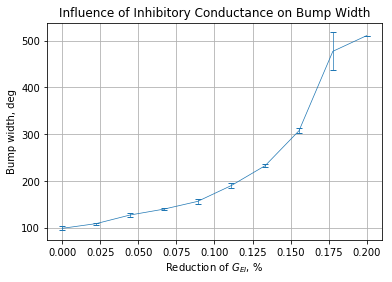

In [202]:
# reproducing Fig 2.C of the paper: 
# plot the bump_width vs disinhibition_level +- its std

plt.errorbar(1-G_coefs/.35, bump_w, bump_std, capsize=3, lw=0.7)
plt.xlabel('Reduction of $G_{EI}$, %')
plt.ylabel('Bump width, deg')
plt.title('Influence of Inhibitory Conductance on Bump Width')
plt.grid()

plt.savefig('pics/ex5/ex5.3.png', dpi=300)
plt.show()

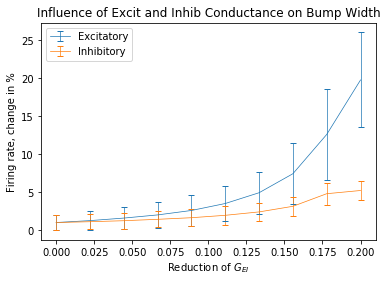

In [200]:
# reproducing Fig 2.D of the paper
# plot the change in firing rates vs disinhibition_level +- its std. 
#Let's start with the excitatory population.

# first you need to express the firing rates changes in percentage
firing_rate_E_perc = firing_rate_E/float(firing_rate_E[-1])

# and the std
firing_rate_E_std_perc = firing_rate_E_std/float(firing_rate_E_std[-1])

# plot the firing rate change of the exc pop +- its std dev
plt.errorbar(1-G_coefs/.35, firing_rate_E_perc, firing_rate_E_std_perc, capsize=3, lw=0.7, label='Excitatory')

# repeat the same passages for the inhibitory population

firing_rate_I_perc = firing_rate_I/float(firing_rate_I[-1])
firing_rate_I_std_perc = firing_rate_I_std/float(firing_rate_I_std[-1])
plt.errorbar(1-G_coefs/.35, firing_rate_I_perc, firing_rate_I_std_perc, capsize=3, lw=0.7, label='Inhibitory')

plt.xlabel('Reduction of $G_{EI}$')
plt.ylabel('Firing rate, change in %')
plt.title('Influence of Excit and Inhib Conductance on Bump Width')
plt.legend()
plt.show()

# Exercise 12.6
In this exercise we study the combined effect of a distractor and disinhibition. Therefore we will focus on Fig. 5 of the paper.

### Exercise 12.6.1
#### [4 points]
Reproduce Fig. 5.A: use the proper keywords in the function simulate_wm in order to introduce a distractor in the system. Choose a value of the keyword "distractor_center_deg" and two values of $G_{EI}$ such that you qualitatively reproduce Fig. 5.A.

**Hint:** For the control case we use the default value of $G_{EI}$ and in the disinhibition case we lower that value by 10%. Simulate for 500ms (keyword sim_time).

**Stimulus parameters:** N_excitatory=1024, N_inhibitory=256, stimulus_center_deg=90, stimulus_width_deg=40, stimulus_strength=0.3 namp, t_stimulus_start=10 ms, t_stimulus_duration=100 ms

**Distractor parameters:** The distractor should have the same strenght, width and duration as the stimulus and should kick in 200ms after the stimulus starts. The position of the distract should be 90˚ higher than the stimulus, just as in the paper figure.

INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


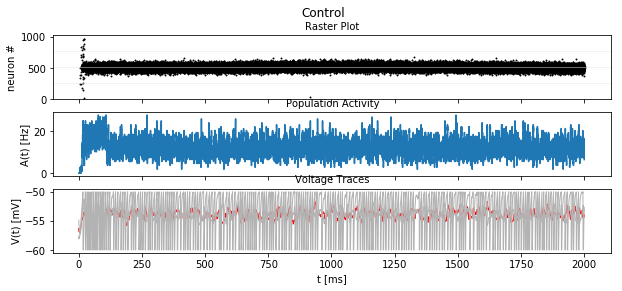

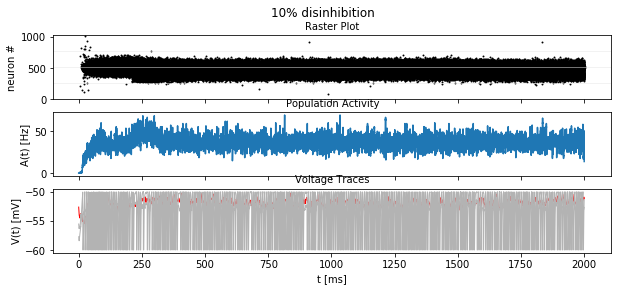

CPU times: user 1min 42s, sys: 3.08 s, total: 1min 45s
Wall time: 1min 52s


In [48]:
%%time
# Reproduction of plot 5A in paper
# raster plot bump with distractor for control case
G_coefs = [.35, .315]

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
voltage_monitor_inhib, idx_monitored_neurons_inhib, \
w_profile = wm_model.simulate_wm(stimulus_center_deg=180, stimulus_width_deg=40, \
                                 stimulus_strength=.3 * b2.namp, t_stimulus_start=10 * b2.ms, \
                                 t_stimulus_duration=100 * b2.ms, sim_time=2000. * b2.ms, \
                                 distractor_center_deg=120, distractor_width_deg=0, \
                                 distractor_strength=0.*b2.namp, t_distractor_start=0*b2.ms, \
                                 t_distractor_duration=0*b2.ms, \
                                 G_excit2inhib=G_coefs[0] * 1.2 * 0.292 * b2.nS)

fig, ax_raster, \
ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, \
                                                       voltage_monitor_excit, t_min=0. * b2.ms)
plt.suptitle("Control")
plt.show()


# raster plot bump with distractor with disinhibition
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
voltage_monitor_inhib, idx_monitored_neurons_inhib, \
w_profile = wm_model.simulate_wm(stimulus_center_deg=180, stimulus_width_deg=40, \
                                 stimulus_strength=.3 * b2.namp, t_stimulus_start=10 * b2.ms, \
                                 t_stimulus_duration=100 * b2.ms, sim_time=2000. * b2.ms, \
                                 distractor_center_deg=120, distractor_width_deg=40, \
                                 distractor_strength=.3*b2.namp, t_distractor_start=210*b2.ms, \
                                 t_distractor_duration=100*b2.ms, \
                                 G_excit2inhib=G_coefs[1] * 1.2 * 0.292 * b2.nS)

fig, ax_raster, \
ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, \
                                                       voltage_monitor_excit, t_min=0. * b2.ms)
plt.suptitle("10% disinhibition")
plt.show()



### Exercise 12.6.2
#### [8 (for the coding) + 6 (for plots) + 3 (for the discussion) points]
1) Use the function "get_theta_time_series" as you did in exercise 5.3 in order to compute $\theta_{report}$ for different positions of the distractor and for 3 values of $G_{EI}$ such that $G_{EI}$ is reduced by 0,7 and 14 % respectively. 

2) Reproduce Fig. 5.B: Plot $\theta_{report}$ as a function of the distractor position for a variation of $G_{EI}$ of 0, 7 and 14% (3 curves).

In [51]:
b2.defaultclock.dt = 0.05 * b2.ms
t_sim= 500 * b2.ms

t_stimulus_start = 10 * b2.ms
t_stimulus_duration = 100 * b2.ms
stimulus_center_deg = 180 #90
stimulus_width_deg = 40
stimulus_strength = 0.3 * b2.namp

t_distractor_start = 210 * b2.ms
t_distractor_duration = 100 *b2.ms
distractor_width_deg = 40
distractor_strength = 0.3 * b2.namp

# distractor angles
rel_distr_angles = np.array([0, 25, 50, 75, 100, 125, 150, 175])
distr_angles = rel_distr_angles + stimulus_center_deg

# synaplse relevant for disinhibtion,  this will also be looped over in the following
disinhib_percentages = np.array([.3, .86, 1.]) # enter here the correct disinhibition percentages
# .3 = 1 - 0.7, .86 = 1 - 14%, 1. -- control
G_excit2inhib_control =  .35 * 1.2 * 0.292 * b2.nS

N_excit = 512
N_inhib = 128
weight_scaling = 4

t_window_width = 100 * b2.ms
snapshot_interval = 20 * b2.ms
n_trials = 4 # increase or decrease the number of trials on the base of the tradeoff between the simulation time and the quality of the outcome

t_snapshots = range(int(math.floor((t_stimulus_start+t_stimulus_duration-t_window_width)/b2.ms)), \
                    int(math.ceil((t_sim-t_window_width)/b2.ms)), int(round(snapshot_interval/b2.ms)))*b2.ms
report = [[[[] for i in range(n_trials)] for j in range(len(distr_angles))] for k in range(len(disinhib_percentages))]
distractibility_windows = [[] for i in range(len(disinhib_percentages))]

In [71]:
for k in range(1): #len(disinhib_percentages)):
    G_excit2inhib = disinhib_percentages[k]*G_excit2inhib_control # set the correct value of G_EI (given G_excit2inhib_control and the disinhib_percentages)
    
    for i in range(len(distr_angles)-2, len(distr_angles)):
        distractor_center_deg = distr_angles[i] # set the correct value of the distractor angular position
        
        for j in range(2):
            rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
            idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
            voltage_monitor_inhib, idx_monitored_neurons_inhib, \
            w_profile = wm_model.simulate_wm(N_excitatory=N_excit, N_inhibitory=N_inhib, \
                                             weight_scaling_factor=weight_scaling,
                                             stimulus_center_deg=stimulus_center_deg, \
                                             stimulus_width_deg=stimulus_width_deg, \
                                             stimulus_strength=stimulus_strength, \
                                             t_stimulus_start=t_stimulus_start, \
                                             t_stimulus_duration=t_stimulus_duration, \
                                             distractor_center_deg=distractor_center_deg, \
                                             distractor_width_deg=distractor_width_deg, \
                                             distractor_strength=distractor_strength, \
                                             t_distractor_start=t_distractor_start, \
                                             t_distractor_duration=t_distractor_duration, \
                                             G_excit2inhib=G_excit2inhib,
                                             sim_time=t_sim)
            
            theta_list = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_width) # extract the population vector as before
            report[k][i][j] = np.mean(theta_list[-int(len(theta_list)/5):]) # compute the mean of theta_list over the last 10% of entries 


In [73]:
#with open('report.pkl', 'wb') as f:
#    pickle.dump(report, f)

# Uncomment to load.
#with open('report.pkl', 'rb') as f:
#    report = pickle.load(f)

In [74]:
# average over repetitions/initializations
report_averaged = np.mean(report, axis=2) # compute the mean of the report. Hint: use the keyword axis = 2
report_std = np.std(report, axis=2) # compute the std of the report. Hint: use the keyword axis = 2

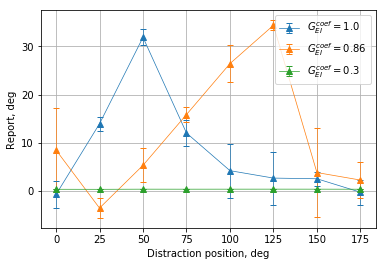

In [105]:
# reproduction of plot 5B in paper
plt.figure()
plt.xlabel("Distraction position, deg")
plt.ylabel("Report, deg")

# in the same graph, plot the report vs. distractor angle curves for the control case and the two disinhibition cases.
# Use the keyword label = ... for the legend

# control curves
# plot the averaged report value vs. the relative distractor angles
# add +- its std. (e.g. as thin, semi-transparent lines above and below)
plt.errorbar(rel_distr_angles, report_averaged[2]-stimulus_center_deg, report_std[2], marker='^', label='$G_{EI}^{coef}=1.0$', capsize=3, lw=0.7)

# ... same for disinhibition 1
plt.errorbar(rel_distr_angles, report_averaged[1]-stimulus_center_deg, report_std[1], marker='^', label='$G_{EI}^{coef}=0.86$', capsize=3, lw=0.7)

# ... same for disinhibition 2
plt.errorbar(rel_distr_angles, report_averaged[0]-stimulus_center_deg, report_std[0], marker='^', label='$G_{EI}^{coef}=0.3$', capsize=3, lw=0.7)

plt.legend()
plt.grid()
plt.show()

3) Comment the graph you made in point 2: how can we interpret the curves? How can we explain their shapes? Why is the maximum of each curve shifted to the right in the case of disinhibition? (Max 10 lines)

- In the control case and in case of mild disinhibition, the curves have a single peak, which is moved towards larger distraction positions in case of disinhibition.
- The peak of each line shows how far away the "seed" of the distractor (see Fig. 5A of the paper) can be to still fuse with the main bump (thus making it wider).
- Notice that the part of the curves before the peak are linear(ish), i.e. the position of the distractor relative to the stimulus linearly influences report bias.
- In case of strong disinhibition, the curve is relatively plain. At this point, the bumps cannot be formed yet, and the activity is spatially equally distributed throughout neurons, that's why there's no preferred direction reported.

4) Reproduce Fig. 5.C: extract the argmax of each of the $\theta_{report}$ curves that you computed in point 1 and plot these 4 values as a function of the corresponding variation of $G_{EI}$.

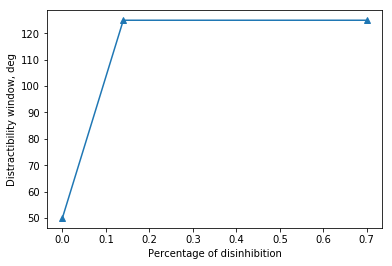

In [103]:
# plot Fig. 5.C

# extract distractibility window (argmax of report curve, see fig. 5 in the paper)
distractibility_windows = rel_distr_angles[np.argmax(report_averaged, axis=1)]
    
# make the corresponding plot: distract. window against disinhibition percentage
plt.figure()
plt.plot(1-disinhib_percentages, distractibility_windows, "^-")
plt.xlabel("Percentage of disinhibition")
plt.ylabel("Distractibility window, deg")
plt.show()

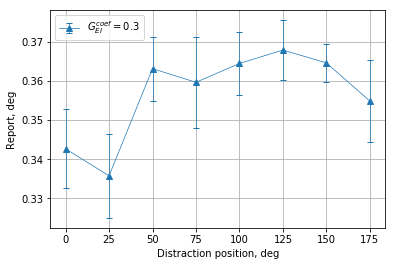

In [106]:
plt.figure()
plt.xlabel("Distraction position, deg")
plt.ylabel("Report, deg")
plt.errorbar(rel_distr_angles, report_averaged[0]-stimulus_center_deg, report_std[0], marker='^', label='$G_{EI}^{coef}=0.3$', capsize=3, lw=0.7)

plt.legend()
plt.grid()
plt.show()

5) Compare the plot you made in point 4 with the first one of exercise 5.3 (the graph correspondind to Fig. 2.B in the paper) and explain the similarity. (Max 5 lines)

- The more the disinhibition, the wider the bump and the larger the angle of potential distractor positions that the bump can cover.
- The distractibility window for 70% disinhibition is not that reliable, because if wee take a look at the report curve (right aboce), then
    - it's plain comparing to the other 2 cases,
    - it doesn't have the same shape with a distinctive peak.
- This is because there is no bump formed in this case, activity is distributed uniformly throughout the network, so there's no preferred position.

PS I realise that it was probably meant to model at 7%, not 0.7 disinhibition (to reproduce Fig. 5B from the paper), but unfortunately I have no time to calculate it this way once again.